In [3]:
#importing the modules pertinent to our model building / analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from ast import literal_eval
import operator
import warnings 
from sklearn.metrics.pairwise import cosine_similarity
warnings.simplefilter('ignore')

In [18]:
#Loading the dataset into a dataframe
file_path =  r'C:/Users/Gregory Bazuaye/Downloads/tmdb_5000_movies.csv'
movies = pd.read_csv(file_path)

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Exploratory Data Analysis

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

 ## -Feature Selection 
    

In [5]:
#Dropping the features that are not required
#1 - The budget
#2 - The homepage
#3- The revenue
#4- The runtime

In [6]:
movies.drop( columns = ['budget' , 'homepage' , 'revenue' ,'runtime'] , axis = 1 , inplace = True)

In [8]:
#Dropping the movies that have a nul vote average
movies.drop(movies[movies['vote_average'].isna() == True].index , axis = 0 , inplace = True)

In [10]:
movies.shape

(4803, 16)

## Feature Engineering

In [19]:
#the genre , production company , production country and spoken anguages columns are all in an object format 
# extracting the names of all these features is crucial .

movies['genres'] = movies['genres'].apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance(x , list)else [])
movies['production_companies'] = movies['production_companies'].apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance (x , list) else [])

movies['production_countries'] = movies['production_countries'].apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance (x, list) else [])

movies['spoken_languages'] = movies['spoken_languages'].apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance (x , list) else [])




In [20]:
movies['date'] = pd.to_datetime(movies['release_date'] , errors ='coerce').dt.year.convert_dtypes()

In [15]:
#Only displaying released movies
movies = movies[movies['status'] == 'Released']
del movies['status']
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,date
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],"Lost in our world, found in another.",John Carter,6.1,2124,2012


In [17]:
movies.shape

(4795, 16)

In [18]:
movies['keywords'] = movies['keywords'].apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance (x,list) else [])

In [19]:
movies.head(10)

,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,spoken_languages,tagline,title,vote_average,vote_count,date
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,"[English, Español]",Enter the World of Pandora.,Avatar,7.2,11800,2009
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,[English],"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,Spectre,6.3,4466,2015
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,[English],The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,[English],"Lost in our world, found in another.",John Carter,6.1,2124,2012
5,"[Fantasy, Action, Adventure]",559,"[dual identity, amnesia, sandstorm, love of on...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],2007-05-01,"[English, Français]",The battle within.,Spider-Man 3,5.9,3576,2007
6,"[Animation, Family]",38757,"[hostage, magic, horse, fairy tale, musical, p...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],2010-11-24,[English],They're taking adventure to new lengths.,Tangled,7.4,3330,2010
7,"[Action, Adventure, Science Fiction]",99861,"[marvel comic, sequel, superhero, based on com...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],2015-04-22,[English],A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,2015
8,"[Adventure, Fantasy, Family]",767,"[witch, magic, broom, school of witchcraft, wi...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[Warner Bros., Heyday Films]","[United Kingdom, United States of America]",2009-07-07,[English],Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,2009
9,"[Action, Adventure, Fantasy]",209112,"[dc comics, vigilante, superhero, based on com...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[DC Comics, Atlas Entertainment, Warner Bros.,...",[United States of America],2016-03-23,[English],Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,2016


# Simple Recommender System
## Mechanism : Recommends the top movies that are currently watched by people in a particular region

 for the rating we are going to make use of a weighted metric ( a weighted rating) that solves the problem of movies with high vote
 .. average but low vote count
 W = ( v / v + m * R   + m / v +m * C)
 where :
 v - the number of votes for that movies
#m - the  minimum number of ratings required to be listed in the chart 
 R - the average rating of the movie
 C - the average rating of movies across the entire dataset


In [20]:
#finding the minimum number of ratings to be listed 
# movies above the 95th percentile

m = round(movies['vote_count'].quantile(0.95))

In [21]:
#finding the mean vote average
C = round(movies['vote_average'].mean() , 2)

In [24]:
#filtering based on those that meet the vote count criterion

filtered_movies = movies[movies['vote_count'] >= m][['title' ,  'vote_count' , 'vote_average' , 'popularity' , 'genres','date' , 'production_companies', 'production_countries', 'overview' ,'tagline' , 'keywords']]


In [26]:
filtered_movies.shape

(240, 11)

In [39]:
# a function to calculate the weighted rating based on the formula

def weighted_rating(dataset):
    v = dataset['vote_count']
    R = dataset['vote_average']
    rating  = round((v*R/(v+m)) + (m*C/(m+v)),1)
    return rating



In [40]:
filtered_movies['weighted_rating'] = filtered_movies.apply(weighted_rating , axis = 1)

In [41]:
filtered_movies.head()

,title,vote_count,vote_average,popularity,genres,date,production_companies,production_countries,overview,tagline,keywords,weighted_rating
0,Avatar,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",2009,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[culture clash, future, space war, space colon...",7.2
1,Pirates of the Caribbean: At World's End,4500,6.9,139.082615,"[Adventure, Fantasy, Action]",2007,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[ocean, drug abuse, exotic island, east india ...",7.0
2,Spectre,4466,6.3,107.376788,"[Action, Adventure, Crime]",2015,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[spy, based on novel, secret agent, sequel, mi...",6.7
3,The Dark Knight Rises,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]",2012,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],Following the death of District Attorney Harve...,The Legend Ends,"[dc comics, crime fighter, terrorist, secret i...",7.5
5,Spider-Man 3,3576,5.9,115.699814,"[Fantasy, Action, Adventure]",2007,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],The seemingly invincible Spider-Man goes up ag...,The battle within.,"[dual identity, amnesia, sandstorm, love of on...",6.5


In [85]:
def simple_recommender(N, genre = '', percentile = 0.95):
    df = movies.copy()
    if genre:
        df['is_genre'] = df['genres'].apply(lambda x: 1 if x.count(genre) > 0 else 0)        
        df = df[df['is_genre'] == 1]
    
    m = round(df['vote_count'].quantile(percentile))
    C = round(df['vote_average'].mean(), 1)
    
    simple_recommender = df[(df['vote_count'] >= m)][['title', 'date', 'vote_count', 'vote_average', 'popularity', 'genres']]
    
    def weighted_rating(x):
        v = x['vote_count']
        R = x['vote_average']
        return round((v*R/(v+m)) + (m*C/(m+v)),1)
    
    simple_recommender['weighted_rating'] = simple_recommender.apply(weighted_rating, axis=1)
    simple_recommender.sort_values(['weighted_rating', 'date'], ascending= [False, False], inplace = True)
    
    return simple_recommender.head(N)

In [86]:
simple_recommender(12)


,title,date,vote_count,vote_average,popularity,genres,weighted_rating
1881,The Shawshank Redemption,1994,8205,8.5,136.747729,"[Drama, Crime]",7.9
65,The Dark Knight,2008,12002,8.2,187.322927,"[Drama, Action, Crime, Thriller]",7.8
662,Fight Club,1999,9413,8.3,146.757391,[Drama],7.8
95,Interstellar,2014,10867,8.1,724.247784,"[Adventure, Drama, Science Fiction]",7.7
96,Inception,2010,13752,8.1,167.583710,"[Action, Thriller, Science Fiction, Mystery, A...",7.7
3232,Pulp Fiction,1994,8428,8.3,121.463076,"[Thriller, Crime]",7.7
329,The Lord of the Rings: The Return of the King,2003,8064,8.1,123.630332,"[Adventure, Fantasy, Action]",7.6
809,Forrest Gump,1994,7927,8.2,138.133331,"[Comedy, Drama, Romance]",7.6
3337,The Godfather,1972,5893,8.4,143.659698,"[Drama, Crime]",7.6
94,Guardians of the Galaxy,2014,9742,7.9,481.098624,"[Action, Science Fiction, Adventure]",7.5


In [87]:
simple_recommender(13 , genre ='Action')

,title,date,vote_count,vote_average,popularity,genres,weighted_rating
96,Inception,2010,13752,8.1,167.583710,"[Action, Thriller, Science Fiction, Mystery, A...",7.6
65,The Dark Knight,2008,12002,8.2,187.322927,"[Drama, Action, Crime, Thriller]",7.6
94,Guardians of the Galaxy,2014,9742,7.9,481.098624,"[Action, Science Fiction, Adventure]",7.3
329,The Lord of the Rings: The Return of the King,2003,8064,8.1,123.630332,"[Adventure, Fantasy, Action]",7.3
262,The Lord of the Rings: The Fellowship of the Ring,2001,8705,8.0,138.049577,"[Adventure, Fantasy, Action]",7.3
330,The Lord of the Rings: The Two Towers,2002,7487,8.0,106.914973,"[Adventure, Fantasy, Action]",7.2
634,The Matrix,1999,8907,7.9,104.309993,"[Action, Science Fiction]",7.2
1990,The Empire Strikes Back,1980,5879,8.2,78.517830,"[Adventure, Action, Science Fiction]",7.2
2912,Star Wars,1977,6624,8.1,126.393695,"[Adventure, Action, Science Fiction]",7.2
3,The Dark Knight Rises,2012,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]",7.1


In [88]:
simple_recommender(30 , genre ='Comedy' )

,title,date,vote_count,vote_average,popularity,genres,weighted_rating
809,Forrest Gump,1994,7927,8.2,138.133331,"[Comedy, Drama, Romance]",7.7
77,Inside Out,2015,6560,8.0,128.655964,"[Drama, Comedy, Animation, Family]",7.5
2285,Back to the Future,1985,6079,8.0,76.603233,"[Adventure, Comedy, Science Fiction, Family]",7.5
298,The Wolf of Wall Street,2013,6571,7.9,95.007934,"[Crime, Drama, Comedy]",7.4
88,Big Hero 6,2014,6135,7.8,203.734590,"[Adventure, Family, Animation, Action, Comedy]",7.3
1532,The Grand Budapest Hotel,2014,4519,8.0,74.417456,"[Comedy, Drama]",7.3
66,Up,2009,6870,7.7,92.201962,"[Animation, Comedy, Family, Adventure]",7.3
788,Deadpool,2016,10995,7.4,514.569956,"[Action, Adventure, Comedy]",7.2
697,The Truman Show,1998,4537,7.8,56.488027,"[Comedy, Drama]",7.2
1541,Toy Story,1995,5269,7.7,73.640445,"[Animation, Comedy, Family]",7.2


# Content based recommendation System

In [127]:
#Incoprporating the metadata of the movies to improve the quality of the recommendations
credits = pd.read_csv(r'C:/Users\Gregory Bazuaye/Downloads/tmdb_5000_credits.csv')

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [128]:
#dropping the duplicate data from the dataset

credits.drop_duplicates(inplace = True)


In [129]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [130]:
#converting the id into an integer type
credits['id'] = credits['movie_id'].astype(int)

movies_ext  = movies[(movies['vote_count'] >= m)][['id' ,'title', 'date', 'vote_count', 'vote_average', 'popularity', 'genres']]


movies_ext.head()

,id,title,date,vote_count,vote_average,popularity,genres
0,19995,Avatar,2009,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]"
1,285,Pirates of the Caribbean: At World's End,2007,4500,6.9,139.082615,"[Adventure, Fantasy, Action]"
2,206647,Spectre,2015,4466,6.3,107.376788,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,2012,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]"
5,559,Spider-Man 3,2007,3576,5.9,115.699814,"[Fantasy, Action, Adventure]"


In [131]:
movies_ext['id'] = movies_ext['id'].astype(int)
credits.drop(columns ='title' , inplace = True)

In [135]:
movies_ext = movies_ext.merge(credits , on ='id')

In [136]:
movies_ext.head()

,id,title,date,vote_count,vote_average,popularity,genres,movie_id,cast,crew
0,19995,Avatar,2009,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,2007,4500,6.9,139.082615,"[Adventure, Fantasy, Action]",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,2015,4466,6.3,107.376788,"[Action, Adventure, Crime]",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,2012,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,559,Spider-Man 3,2007,3576,5.9,115.699814,"[Fantasy, Action, Adventure]",559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."


In [138]:
movies_ext.head()

,id,title,date,vote_count,vote_average,popularity,genres,movie_id,cast,crew
0,19995,Avatar,2009,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,2007,4500,6.9,139.082615,"[Adventure, Fantasy, Action]",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,2015,4466,6.3,107.376788,"[Action, Adventure, Crime]",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,2012,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,559,Spider-Man 3,2007,3576,5.9,115.699814,"[Fantasy, Action, Adventure]",559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."


In [139]:
movies_ext['cast'].head(3)

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
Name: cast, dtype: object

In [140]:
#Extracting the names of the cast members
movies_ext['cast'] = movies_ext['cast'].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_ext['cast'] = movies_ext['cast'].apply(lambda x: x[:5] if len(x) >=5 else x)

In [141]:
import numpy as np
def get_director(crew):
    for i in crew :
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [142]:
movies_ext['crew'] = movies_ext['crew'].apply(literal_eval).apply(get_director)

In [143]:
movies_ext.head(3)

,id,title,date,vote_count,vote_average,popularity,genres,movie_id,cast,crew
0,19995,Avatar,2009,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,2007,4500,6.9,139.082615,"[Adventure, Fantasy, Action]",285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,2015,4466,6.3,107.376788,"[Action, Adventure, Crime]",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes


In [144]:
movies_ext['directors'] = movies_ext['crew']

movies_ext.drop(columns ='crew' , inplace = True)

In [145]:
movies_ext.head()

,id,title,date,vote_count,vote_average,popularity,genres,movie_id,cast,directors
0,19995,Avatar,2009,11800,7.2,150.437577,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,2007,4500,6.9,139.082615,"[Adventure, Fantasy, Action]",285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,2015,4466,6.3,107.376788,"[Action, Adventure, Crime]",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,2012,9106,7.6,112.312950,"[Action, Crime, Drama, Thriller]",49026,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,559,Spider-Man 3,2007,3576,5.9,115.699814,"[Fantasy, Action, Adventure]",559,"[Tobey Maguire, Kirsten Dunst, James Franco, T...",Sam Raimi


In [146]:
movies_ext['cast'] = movies_ext['cast'].apply(lambda x : [str.lower(i.replace(" " , "")) for i in x])
movies_ext['directors'] = movies_ext['directors'].astype(str).apply(lambda x : [str.lower(x.replace(" " , "")) ])


In [148]:
#movies_ext['directors'] = movies_ext['directors'].apply(lambda x : [i  for i in x.split()])
movies_ext['metadata'] = movies_ext['directors'] + movies_ext['cast'] + movies_ext['genres']
movies_ext['metadata'] = movies_ext['directors'].apply(lambda x : ' '.join(x))

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

meta_data = np.array(movies_ext['metadata'])
vectorizer =  CountVectorizer(max_features = 10000, stop_words ='english')

vectors = vectorizer.fit_transform(meta_data)




In [175]:
vectors.shape

(240, 143)

In [176]:
similarity = pd.DataFrame(cosine_similarity(vectors))

similarity

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [163]:
movies_ext = movies_ext.reset_index()
data = movies_ext[['title' , 'date' , 'genres']]
indices = pd.Series(movies_ext.index , index = movies_ext['title'])



In [170]:
def get_recommendations(title , N = 30):
    idx = indices[title]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores , key = lambda x : x[1] , reverse = True)
    sim_scores = sim_scores[ : N+1]
    movie_indices = [ i[0] for i in sim_scores]
    sim_scores = pd.DataFrame(sim_scores , columns = ['index' , 'similarity_score'])
    movies = movies_ext.iloc[movie_indices][['title', 'genres', 'vote_count', 'vote_average', 'date']]
    final_data = movies.merge(sim_scores, left_index = True, right_on ='index')
    final_data['similarity_score'] = round(final_data['similarity_score']*100,2)
    del final_data['index']
    
    m = round(movies_ext['vote_count'].quantile(0.90))
    C = round(movies_ext['vote_average'].mean() , 1)
    
    def weighted_rating (dataset):
        v = dataset['vote_count']
        R = dataset['vote_average']
        return round((v*R/(v+m)) + (m*C/(m+v)),1)
    
    final_data['weighted_rating'] = final_data.apply(weighted_rating , axis =1)
    final_data.sort_values(['weighted_rating' , 'date'] , ascending = False , inplace = True)
    
    return final_data.head(N)

    

In [180]:
get_recommendations('The Avengers' , 15)

,title,genres,vote_count,vote_average,date,similarity_score,weighted_rating
5,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",9106,7.6,2012,0.0,7.4
1,The Avengers,"[Science Fiction, Action, Adventure]",11776,7.4,2012,100.0,7.3
7,Tangled,"[Animation, Family]",3330,7.4,2010,0.0,7.3
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]",5293,7.4,2009,0.0,7.3
0,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]",6767,7.3,2015,100.0,7.2
14,The Hobbit: The Battle of the Five Armies,"[Action, Adventure, Fantasy]",4760,7.1,2014,0.0,7.2
2,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",11800,7.2,2009,0.0,7.2
3,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",4500,6.9,2007,0.0,7.1
10,Pirates of the Caribbean: Dead Man's Chest,"[Adventure, Fantasy, Action]",5246,7.0,2006,0.0,7.1
4,Spectre,"[Action, Adventure, Crime]",4466,6.3,2015,0.0,6.9


In [181]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2') # All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
embeddings = model.encode(text_data, show_progress_bar=True)

ModuleNotFoundError: No module named 'sentence_transformers'

In [4]:
user_data = pd.read_csv(r"C:\Users\Gregory Bazuaye\Downloads\ratings_small.csv")
user_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
user_data['userId'].nunique()

671

In [6]:
user_data['movieId'].nunique()

9066

In [7]:
sorted(user_data['rating'].unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [21]:
user_data['movieId'] = user_data['movieId'].astype(int)
movies['id'] = movies['id'].astype(int)
user_data = user_data.merge(movies[['title' , 'genres' ,'date' , 'id']] , how = 'inner' , left_on = 'movieId' , right_on = 'id')

user_data.head(10)

,userId,movieId,rating,timestamp,title_x,genres_x,date_x,id_x,title_y,genres_y,date_y,id_y,title,genres,date,id
0,1,2105,4.0,1260759139,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
1,4,2105,4.0,949896114,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
2,15,2105,4.0,1052896867,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
3,30,2105,2.0,994439964,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
4,34,2105,4.0,973747765,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
5,35,2105,3.5,1174450064,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
6,41,2105,5.0,1093886731,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
7,49,2105,3.0,978039891,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
8,59,2105,1.0,1144756192,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105
9,73,2105,3.0,1255500870,American Pie,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",1999,2105,American Pie,"[Comedy, Romance]",1999,2105,American Pie,"[Comedy, Romance]",1999,2105


In [23]:
user_data.drop(columns = ['genres_x' ,'genres_y', 'id_x' , 'id_y' , 'title_x'] , inplace = True)

In [24]:
user_data.head()

,userId,movieId,rating,timestamp,date_x,title_y,date_y,title,genres,date,id
0,1,2105,4.0,1260759139,1999,American Pie,1999,American Pie,"[Comedy, Romance]",1999,2105
1,4,2105,4.0,949896114,1999,American Pie,1999,American Pie,"[Comedy, Romance]",1999,2105
2,15,2105,4.0,1052896867,1999,American Pie,1999,American Pie,"[Comedy, Romance]",1999,2105
3,30,2105,2.0,994439964,1999,American Pie,1999,American Pie,"[Comedy, Romance]",1999,2105
4,34,2105,4.0,973747765,1999,American Pie,1999,American Pie,"[Comedy, Romance]",1999,2105


In [25]:
agg_ratings = user_data.groupby('title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()

In [26]:
agg_ratings.head()

,title,mean_rating,number_of_ratings
0,10 Things I Hate About You,2.642857,7
1,12 Angry Men,4.000000,1
2,1408,5.000000,1
3,15 Minutes,4.000000,5
4,16 Blocks,4.000000,1


In [29]:
val = round(agg_ratings['number_of_ratings'].quantile(0.90))
val

59

In [30]:
agg_ratings_final = agg_ratings[agg_ratings['number_of_ratings'] > val]
agg_ratings_final.shape

(86, 3)

In [31]:
agg_ratings_final.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
622,Terminator 3: Rise of the Machines,4.256173,324
569,Solaris,4.138158,304
420,Monsoon Wedding,3.706204,274
405,Men in Black II,4.256696,224
561,Silent Hill,3.674419,215


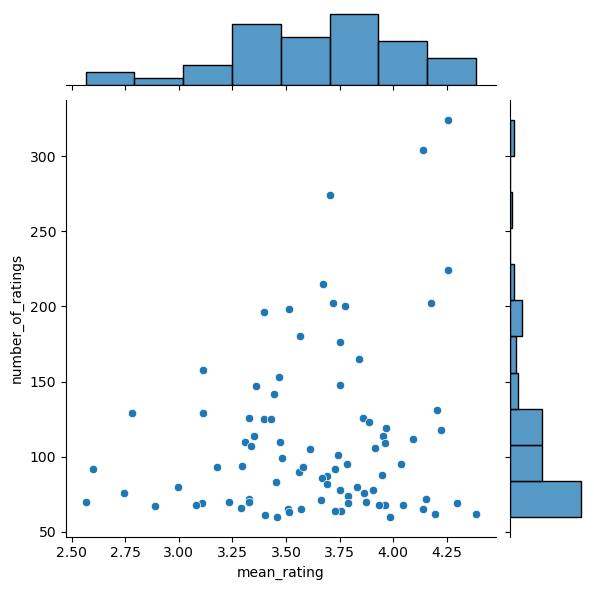

In [32]:
import seaborn as sb
sb.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_final)

In [33]:
user_data_final = pd.merge(user_data, agg_ratings_final[['title']], on='title', how='inner')
user_data_final.shape

(9556, 11)

In [34]:
user_data_final.head()

,userId,movieId,rating,timestamp,date_x,title_y,date_y,title,genres,date,id
0,2,62,3.0,835355749,1968,2001: A Space Odyssey,1968,2001: A Space Odyssey,"[Science Fiction, Mystery, Adventure]",1968,62
1,15,62,2.0,1093028336,1968,2001: A Space Odyssey,1968,2001: A Space Odyssey,"[Science Fiction, Mystery, Adventure]",1968,62
2,18,62,4.0,856006886,1968,2001: A Space Odyssey,1968,2001: A Space Odyssey,"[Science Fiction, Mystery, Adventure]",1968,62
3,23,62,4.0,1166728220,1968,2001: A Space Odyssey,1968,2001: A Space Odyssey,"[Science Fiction, Mystery, Adventure]",1968,62
4,44,62,5.0,858707138,1968,2001: A Space Odyssey,1968,2001: A Space Odyssey,"[Science Fiction, Mystery, Adventure]",1968,62


In [35]:
user_data.drop(columns = ['date_y' , 'date_x'] , inplace = True)

In [37]:
matrix = user_data_final.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,"20,000 Leagues Under the Sea",2001: A Space Odyssey,A Nightmare on Elm Street,A Time to Kill,Aliens vs Predator: Requiem,Almost Famous,Arlington Road,Armageddon,Asterix at the Olympic Games,Back to the Future Part II,...,The Sixth Sense,The Talented Mr. Ripley,The Terminal,The Thirteenth Floor,The Thomas Crown Affair,Titanic,To Kill a Mockingbird,Two Brothers,Wag the Dog,Y Tu Mamá También
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,...,NaN,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,4.0,3.5,4.0,NaN
6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
matrix_norm = round(matrix.subtract(matrix.mean(axis = 1) , axis = 'rows') ,2)

In [39]:
matrix_norm = matrix_norm.fillna(0)
matrix_norm.head()

title,"20,000 Leagues Under the Sea",2001: A Space Odyssey,A Nightmare on Elm Street,A Time to Kill,Aliens vs Predator: Requiem,Almost Famous,Arlington Road,Armageddon,Asterix at the Olympic Games,Back to the Future Part II,...,The Sixth Sense,The Talented Mr. Ripley,The Terminal,The Thirteenth Floor,The Thomas Crown Affair,Titanic,To Kill a Mockingbird,Two Brothers,Wag the Dog,Y Tu Mamá También
userId,,,,,,,,,,,,,,,,,,,,,
2,0.00,-0.44,-0.44,0.0,0.00,0.0,0.00,0.0,0.0,-0.44,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,-0.44,0.0
3,0.00,0.00,-0.79,0.0,0.00,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.00,-1.29,0.00,0.00,0.0
4,-1.35,0.00,0.00,0.0,-0.35,0.0,0.65,0.0,0.0,0.00,...,0.0,0.65,0.65,0.0,0.65,0.00,0.00,0.00,0.00,0.0
5,0.00,0.00,0.08,0.0,0.08,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,1.08,0.08,-0.42,0.08,0.0
6,-1.57,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0


In [41]:
def similar_users_fn(user_id, matrix, K=5):
    
    # Create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # Create a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # Get cosine similarity between user and each of the other users
    similarities = cosine_similarity(user, other_users)[0].tolist()
    
    # Create list of ids of these users
    ids = other_users.index.tolist()
    
    # Create key/values pairs of user id and their similarity
    id_similarity = dict(zip(ids, similarities))
    
    # Sort by similarity (desc)
    id_similarity_sorted = [(k, v) for k, v in sorted(id_similarity.items(), key=lambda item: item[1], reverse = True)]
    
    # Grab k users off the top
    users = [u for u in id_similarity_sorted[:K]]
    
    return users

In [42]:
user = 39
similar_user_ids = similar_users_fn(user, matrix_norm)
similar_user_ids

[(24, 0.5264975593521444),
 (38, 0.45686301679173813),
 (586, 0.4327215334918712),
 (172, 0.42112031547366396),
 (445, 0.41164445642476316)]

In [46]:
import numpy as np
def user_based_recommender(user_id, matrix, items=5, users=5):
    
    similar_user_ids_and_ratings = pd.DataFrame(similar_users_fn(user_id, matrix, users), columns = ['similar_user_ids', 'similarity_score'])
    
    # Load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_ids_and_ratings['similar_user_ids'])]
    similar_users = similar_users.merge(similar_user_ids_and_ratings, left_on = 'userId', right_on = 'similar_user_ids')
    
    # Calc weighted avg ratings for movies across the N similar users
    cols = similar_users.columns[:-2]
    final_ratings = {}
    for movie in cols:
        final_ratings[movie] = round(np.average(similar_users[movie], axis = 0, weights = similar_users['similarity_score']),2)
    
    # Convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(final_ratings.items(), columns = ['title', 'weighted_average'])
      
    # Load vector for the current user
    user_df = matrix[matrix.index == user_id]
    
    # Transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    
    # Rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    
    # Get only those movies with rating as 0 since the user has not watched them yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    
    # Convert it into a list which contains movies the user has not seen
    movies_unseen = user_df_transposed.index.tolist()
    
    # Filter weighted avg ratings given by similar users only for those movies the current user has not seen
    similar_users_filtered = similar_users_df[similar_users_df['title'].isin(movies_unseen)]
    
    # Order the dataframe by highest rated movies
    similar_users_df_ordered = similar_users_filtered.sort_values(by=['weighted_average'], ascending=False)
    
#     # Grab the top n movies   
#     top_n_movies = similar_users_df_ordered.head(items)
    
#     # Lookup these movies in the main dataframe containing movie info to get their information
#     movie_information = md[md['title'].isin(top_n_movies['title'])][['id', 'title', 'year', 'vote_average', 'genres']]
    
    return similar_users_df_ordered[:items]

In [47]:
user_based_recommender(39, matrix_norm, 15)

,title,weighted_average
15,Boogie Nights,0.31
37,Men in Black II,0.25
84,Wag the Dog,0.12
39,Monsoon Wedding,0.12
45,Notting Hill,0.12
5,Almost Famous,0.06
0,"20,000 Leagues Under the Sea",0.00
54,Reservoir Dogs,0.00
58,Scarface,0.00
57,Run Lola Run,0.00


## Item based Collaborative filtering

In [48]:
matrix_2 = user_data_final.pivot_table(index='title', columns='userId', values='rating')
matrix_2.head()

userId,2,3,4,5,6,7,8,9,10,11,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
A Nightmare on Elm Street,3.0,2.5,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN
A Time to Kill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aliens vs Predator: Requiem,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [50]:
matrix_norm_2 = round(matrix_2.subtract(matrix_2.mean(axis= 1) , axis = 'rows') , 2)
matrix_norm_2 = matrix_norm_2.fillna(0)
matrix_norm_2.head()

userId,2,3,4,5,6,7,8,9,10,11,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"20,000 Leagues Under the Sea",0.00,0.00,0.44,0.00,-0.56,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2001: A Space Odyssey,-0.69,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,-0.69,0.0,0.00,0.0,0.0,0.0,0.0
A Nightmare on Elm Street,-0.57,-1.07,0.00,0.43,0.00,-0.57,0.0,0.0,0.0,0.0,...,0.43,0.0,0.43,-0.57,0.0,-0.57,0.0,0.0,0.0,0.0
A Time to Kill,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
Aliens vs Predator: Requiem,0.00,0.00,0.44,0.44,0.00,0.00,0.0,0.0,0.0,0.0,...,-0.56,0.0,0.00,0.00,0.0,-0.56,0.0,0.0,0.0,0.0


In [51]:
def similarity_score(title , matrix):
    item = matrix[matrix.index == title]
    other_items = matrix[matrix.index != title]
    
    other_items['similarity_score'] = cosine_similarity(item , other_items)[0].tolist()
    other_items_df = pd.DataFrame(other_items.to_records())
    
    return other_items_df.sort_values(by = 'similarity_score', ascending = False)


In [52]:
movie = 'Persepolis'
similarity_score(movie, matrix_norm_2)

,title,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,similarity_score
21,Die Hard 2,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.55,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.259884
46,Ocean's Eleven,-0.83,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.17,0.00,0.0,0.00,0.00,0.203684
33,Lolita,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,-0.33,0.00,0.00,0.00,0.0,0.00,0.00,0.180778
4,Aliens vs Predator: Requiem,0.00,0.0,0.44,0.44,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,-0.56,0.00,0.0,0.00,0.00,0.177717
54,Rocky Balboa,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.168134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,The Hours,1.28,0.0,-0.72,0.00,0.0,0.28,0.0,0.00,0.0,...,0.0,0.00,0.28,1.28,-0.72,0.00,0.0,-2.72,0.28,-0.023639
22,Dogtown and Z-Boys,0.00,0.0,1.24,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,-0.76,0.00,0.00,0.00,0.0,0.00,0.00,-0.027237
37,Men in Black II,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.74,0.0,...,0.0,0.00,0.00,0.00,0.74,0.74,0.0,0.74,-0.26,-0.080024
36,Madagascar,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-0.093305


In [53]:
def item_based_recommender(user, matrix, items = 5):
    
    # Getting the titles of movies the user has watched
    user_watched_movies_df = pd.DataFrame(matrix[(matrix[user] != 0)][user])
    user_watched_movies_df = pd.DataFrame(user_watched_movies_df.to_records())
    user_watched_movies_df_title = user_watched_movies_df['title'].tolist()
    
    # Getting the titles of movies the user hasn't watched
    user_unwatched_movies_df = pd.DataFrame(matrix[(matrix[user] == 0)][user])
    user_unwatched_movies_df = pd.DataFrame(user_unwatched_movies_df.to_records())
    user_unwatched_movies_title = user_unwatched_movies_df['title'].tolist()
    
    recommendations = {}
    
    # For each unwatched movie, getting the similarity score against the movies the user has watched
    # Then calculating the weighted average to get the predicted rating
    for movie in user_unwatched_movies_title:
        sim_matrix = similarity_score(movie, matrix)
        sim_matrix = sim_matrix[sim_matrix['title'].isin(user_watched_movies_df_title)][['title', str(user), 'similarity_score']]
        weighted_rating = round(np.average(sim_matrix[str(user)], axis = 0, weights = sim_matrix['similarity_score']),2)
        recommendations[movie] = weighted_rating
    
    # Convert to dataframe so its easy to sort and filter and then sorting by the predicted rating
    recommendations_df = pd.DataFrame(recommendations.items(), columns = ['title', 'predicted_rating'])
    recommendations_df = recommendations_df.sort_values(by = 'predicted_rating', ascending = False)
    
    return recommendations_df[:items]

In [54]:
item_based_recommender(39, matrix_norm_2, 15)

,title,predicted_rating
25,Jarhead,2.57
10,Barry Lyndon,0.99
37,My Best Friend's Wedding,0.74
24,Imagine Me & You,0.73
45,Rambo III,0.72
0,"20,000 Leagues Under the Sea",0.71
5,Almost Famous,0.67
55,Star Wars,0.64
17,Dave Chappelle's Block Party,0.64
43,Persepolis,0.63


In [1]:
#from surprise import Reader, Dataset
#from surprise.model_selection import cross_validate

In [57]:
!pip install surpise

ERROR: Could not find a version that satisfies the requirement surpise (from versions: none)
ERROR: No matching distribution found for surpise


## Model Based Reccomendation System

In [2]:
#reader = Reader(rating_scale=(0.5, 5))
#data = Dataset.load_from_df(user_data_final[['userId', 'movieId', 'rating']], reader)